<a href="https://colab.research.google.com/github/AdrianSKazi/Reinforcement-Learning/blob/main/1_Cartpole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip -q install gymnasium
!pip -q install 'gymnasium[classic-control]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.1 MB/s eta 0:00:00


---

# Problem Description

## Input Data (State)

A 4-element continuous vector:

$$\text{[cart_position, cart_velocity, pole_angle, pole_angular_velocity]}$$

Example:

$$[0.5,−0.1,0.05,0.2]$$

* Cart Position: 0.5 units (right of center)
* Cart Velocity: -0.1 (moving left)
* Pole Angle: 0.05 radians (slightly tilted)
* Pole Angular Velocity: 0.2 (rotating clockwise)

---
## Output Data (Action)

A discrete value indicating the movement direction:

* 0: Move cart left
* 1: Move cart right

Example:

$$ Action
=
1$$

* Move the cart to the right.

---
## Goal

Maximize the total reward by keeping the pole balanced upright on the cart.

Mathematical Goal:
Maximize the cumulative reward:

$$\sum_{t=0}^T R$$

Where:

$R_t = 1$ at each time step until termination

---
## Reward
A scalar value:

$$𝑅_𝑡=1$$

The reward is given for every step in which the cart pole doesn't fall down

Example:

If the pole is balanced for 200 time steps, the total reward = 200.

---
## Termination
The episode ends if:

1. $|\text{pole_angle}| > 12^o$
2. $|\text{cart_position}| > 2.4 \text{ units}$
3. Maximum time steps (500) are reached.

Example:

If
pole_angle
=
0.25 the episode terminates.
If
cart_position
=
−
2.5 units, the episode terminates.

In [3]:
from IPython.display import Image

# URL of the GIF
gif_url = "https://www.gymlibrary.dev/_images/cart_pole.gif"

# Display the GIF
Image(url=gif_url)

---

# Random actions

Let's see the outcome of model which takes randomly left or right action.

In [19]:
import gymnasium as gym
import time

# Create the environment
env = gym.make('CartPole-v1')

# Reset the environment
obs, info = env.reset()

# Single epoch rewards for single epoch
epoch_rewards = 0

# List of all epoch rewards
random_all_epochs_rewards = []

# Run the environment for a fixed number of steps
for _ in range(100_000):
    # Take a random action
    action = env.action_space.sample()

    # Add reward
    epoch_rewards += 1

    # Step through the environment
    obs, reward, done, truncated, info = env.step(action)

    # If breaks
    if done or truncated:
        print('epoch rewards:', epoch_rewards)
        random_all_epochs_rewards.append(epoch_rewards)
        epoch_rewards = 0
        env.reset()

# Close the environment
env.close()

epoch rewards: 19
epoch rewards: 14
epoch rewards: 24
epoch rewards: 9
epoch rewards: 31
epoch rewards: 16
epoch rewards: 35
epoch rewards: 18
epoch rewards: 34
epoch rewards: 12
epoch rewards: 49
epoch rewards: 25
epoch rewards: 32
epoch rewards: 13
epoch rewards: 54
epoch rewards: 21
epoch rewards: 18
epoch rewards: 19
epoch rewards: 61
epoch rewards: 21
epoch rewards: 15
epoch rewards: 24
epoch rewards: 17
epoch rewards: 48
epoch rewards: 19
epoch rewards: 13
epoch rewards: 30
epoch rewards: 30
epoch rewards: 19
epoch rewards: 16
epoch rewards: 27
epoch rewards: 9
epoch rewards: 24
epoch rewards: 12
epoch rewards: 16
epoch rewards: 30
epoch rewards: 44
epoch rewards: 18
epoch rewards: 31
epoch rewards: 38
epoch rewards: 22
epoch rewards: 30
epoch rewards: 28
epoch rewards: 17
epoch rewards: 12
epoch rewards: 12
epoch rewards: 9
epoch rewards: 18
epoch rewards: 20
epoch rewards: 13
epoch rewards: 46
epoch rewards: 48
epoch rewards: 28
epoch rewards: 30
epoch rewards: 15
epoch rewards

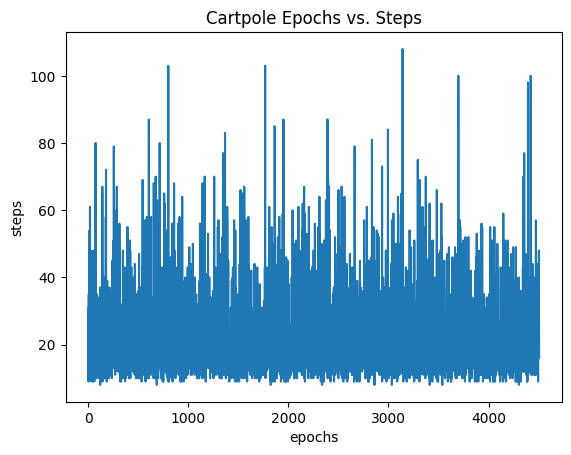

In [20]:
import matplotlib.pyplot as plt

def plot_rewards(rewards):
  plt.plot(rewards)
  plt.xlabel('epochs')
  plt.ylabel('steps')
  plt.title('Cartpole Epochs vs. Steps')

plot_rewards(random_all_epochs_rewards)

In [21]:
import numpy as np
np.mean(random_all_epochs_rewards)

22.191300488237903

Here, we can see how good our model is at keeping the cart pole up. At most, the model can keep the cart pole up for around 100 steps, which is pretty weak in comparison with 500 maximum steps. On average our model can pull out 20 steps.

# MLP actions

In [8]:
!pip -q install stable_baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 3.7 MB/s eta 0:00:00


In [23]:
import gymnasium as gym
from stable_baselines3 import PPO

# Create the environment
env = gym.make('CartPole-v1')

# Initialize the PPO model
model = PPO('MlpPolicy', env, verbose=1)

# Train the model for 10,000 steps (adjust as needed)
model.learn(total_timesteps=10000)

# Reset the environment
obs, info = env.reset()

# Single epoch rewards for single epoch
epoch_rewards = 0

# List of all epoch rewards
mlp_all_epochs_rewards = []

# Run the environment for a fixed number of steps
for _ in range(100_000):
    # Use the trained model to predict the action
    action, _states = model.predict(obs, deterministic=True)

    # Step through the environment
    obs, reward, done, truncated, info = env.step(action)

    # Add reward
    epoch_rewards += reward

    # If the episode ends
    if done or truncated:
        print('Epoch rewards:', epoch_rewards)
        mlp_all_epochs_rewards.append(epoch_rewards)
        epoch_rewards = 0
        obs, info = env.reset()

# Close the environment
env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.9     |
|    ep_rew_mean     | 21.9     |
| time/              |          |
|    fps             | 1249     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27.1        |
|    ep_rew_mean          | 27.1        |
| time/                   |             |
|    fps                  | 914         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008824252 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss   

In [36]:
np.mean(mlp_all_epochs_rewards)

391.16470588235296

MLP on average gains over 390 steps within each episode

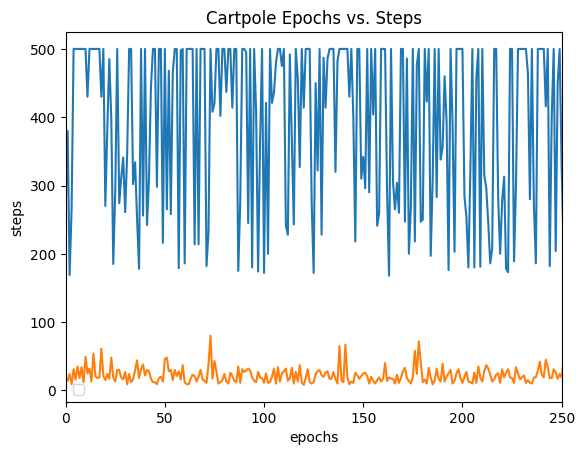

In [34]:
plot_rewards(mlp_all_epochs_rewards)
plot_rewards(random_all_epochs_rewards)
plt.xlim(0,250)
plt.legend()

Here we can see that MLP Policy hits 500 steps very often, while random policy is of course pretty weak.